# CIND820: Big Data Analytics Project

## Data: Estimation of obesity levels based on eating habits and physical condition

### Exploratory Data Analysis


In [5]:
# Import libraries and read the dataset
import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip3 install matplotlib
!pip3 install graphviz

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [6]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Load the data
# df=pd.read_csv(r'C:\Users\HP\Downloads\ObesityDataSet_raw_and_data_sinthetic.csv')

df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

#View the data
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
#Basic information

df.info()

#Check the data description 

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  NObeyesdad      2111 non-null   object 
dtypes: float64(8), object(9)
memory u

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [135]:
#Check the duplicates

df.duplicated().sum()


24

In [19]:
#Check the null values

df.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
NObeyesdad        0
dtype: int64

In [20]:
# Replace null values

# df.replace(np.nan,'0',inplace = True)

# Check the changes now
# df.isnull().sum()

In [21]:
#Check the datatypes


df.dtypes

Gender             object
Age               float64
Height            float64
Weight            float64
family_history     object
FAVC               object
FCVC              float64
NCP               float64
CAEC               object
SMOKE              object
CH2O              float64
SCC                object
FAF               float64
TUE               float64
CALC               object
MTRANS             object
NObeyesdad         object
dtype: object

In [140]:
#Check unique values in Age, Height and Weight

df['Age'].unique()


array([21.      , 23.      , 27.      , ..., 22.524036, 24.361936,
       23.664709])

In [139]:
df['Height'].unique()

array([1.62    , 1.52    , 1.8     , ..., 1.752206, 1.73945 , 1.738836])

In [141]:
df['Weight'].unique()

array([ 64.      ,  56.      ,  77.      , ..., 133.689352, 133.346641,
       133.472641])

<AxesSubplot:ylabel='Frequency'>

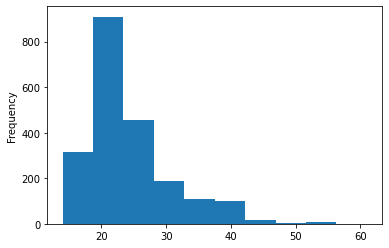

In [29]:
# The distribution of Age, Height and Weight.

df["Age"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

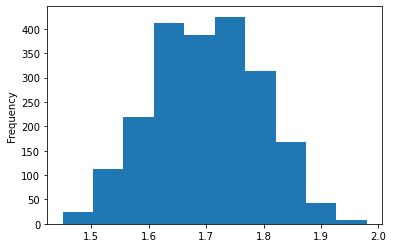

In [83]:
df["Height"].plot(kind = 'hist')


<AxesSubplot:ylabel='Frequency'>

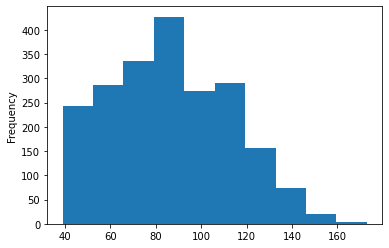

In [31]:
df["Weight"].plot(kind = 'hist')

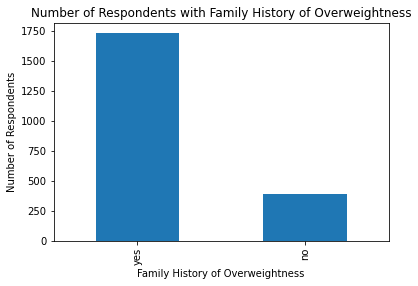

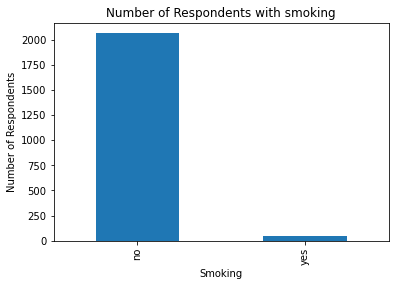

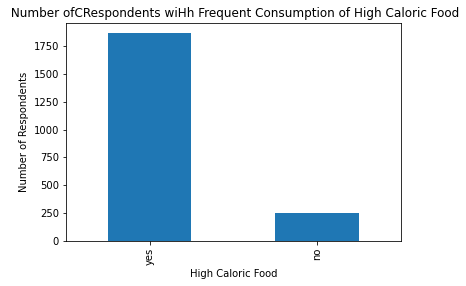

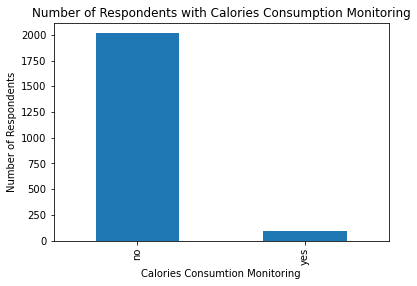

In [114]:
# Attributes with Yes or No Responsses 

# Family History 
famHis = df['family_history']. value_counts()
famHis
famHis.plot(kind='bar')
plt.title("Number of Respondents with Family History of Overweightness")
plt.xlabel("Family History of Overweightness")
plt.ylabel('Number of Respondents')
plt.show()

# Smoking Habits 
smoke = df['SMOKE']. value_counts()
smoke 
smoke .plot(kind='bar')
plt.title("Number of Respondents with smoking")
plt.xlabel("Smoking")
plt.ylabel('Number of Respondents')
plt.show()

# Frequent consumption of high caloric food 
favc = df['FAVC']. value_counts()
favc
favc .plot(kind='bar')
plt.title(" Number ofCRespondents wiHh Frequent Consumption of High Caloric Food")
plt.xlabel("High Caloric Food")
plt.ylabel('Number of Respondents')
plt.show()

# Calories consumption monitoring
scc = df['SCC']. value_counts()
scc
scc .plot(kind='bar')
plt.title("Number of Respondents with Calories Consumption Monitoring")
plt.xlabel("Calories Consumtion Monitoring")
plt.ylabel('Number of Respondents')
plt.show()


Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64


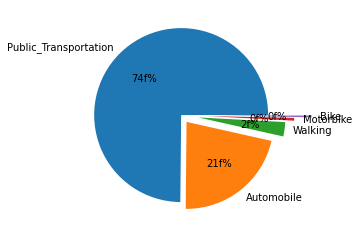

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64


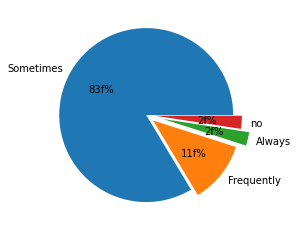

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64


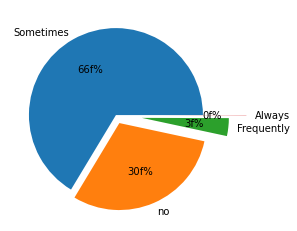

In [134]:
# Attributes with Categories 

# Means of Transportation
mtransdata = df['MTRANS']. value_counts()
mtransdata
print(mtransdata)
mtransdata.plot(kind='pie', ylabel="", autopct='%1.if%%', explode = [0, 0.1, 0.2, 0.3, 0.5])
plt.show()

# Consumption of food between meals (CAEC)
CAEC = df['CAEC']. value_counts()
CAEC
print(CAEC)
CAEC.plot(kind='pie', ylabel="", autopct='%1.if%%', explode = [0, 0.1, 0.2, 0.1])
plt.show()

# Consumption of alcohol (CALC)
CALC = df['CALC']. value_counts()
CALC
print(CALC)
CALC.plot(kind='pie', ylabel="", autopct='%1.if%%', explode = [0, 0.1, 0.3, 0.5])
plt.show()

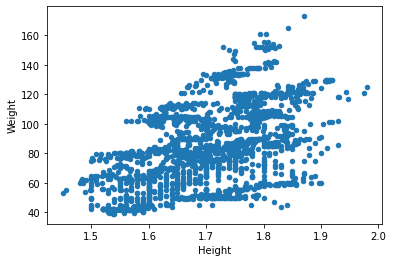

In [32]:
# Check the relationship between Height and Weight
df.plot(kind = 'scatter', x = 'Height', y = 'Weight')

plt.show()

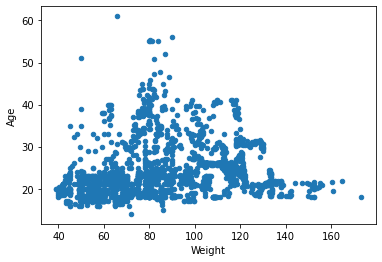

In [36]:
# Check the relationship between Weight and Age
df.plot(kind = 'scatter', x = 'Weight', y = 'Age')

plt.show()

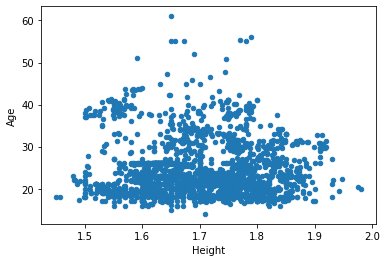

In [38]:
# Check the relationship between Height and Age
df.plot(kind = 'scatter', x = 'Height', y = 'Age')

plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Height'>

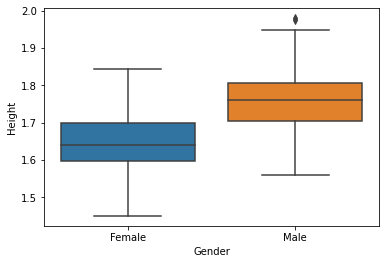

In [97]:
# Check the genderwise distribution of heignt 
sns.boxplot(x='Gender', y='Height', data=df)

<AxesSubplot:xlabel='Gender', ylabel='Weight'>

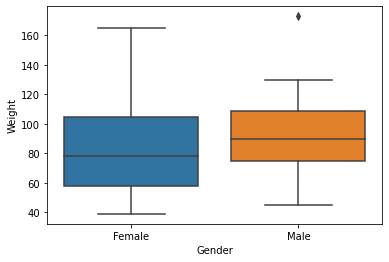

In [98]:
# Check the genderwise distribution of weignt 
sns.boxplot(x='Gender', y='Weight', data=df)

Text(0, 0.5, 'Frequency')

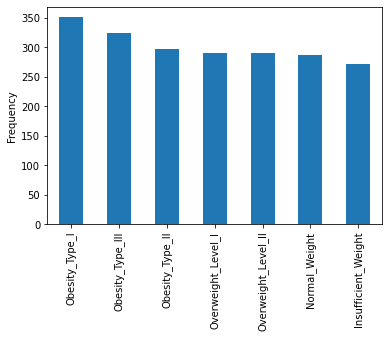

In [118]:
# Check the distribution of obesity levels
obsdata = df['NObeyesdad']. value_counts()
obsdata
obsdata.plot(kind='bar')
plt.ylabel('Frequency')

Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: NObeyesdad, dtype: float64
Index(['Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II',
       'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight',
       'Insufficient_Weight'],
      dtype='object')


Text(0, 0.5, 'Percent')

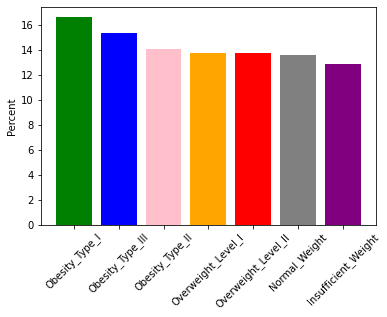

In [119]:
# Check the distribution of obesity levels in percentage
obsPerc = obsdata/sum(obsdata)*100
categories = obsPerc.keys()
print(obsPerc)
print(categories)
plt.bar(categories, obsPerc, color=('green', 'blue', 'pink', 'orange', 'red', 'grey', 'purple'))
plt.xticks(rotation=45)
plt.ylabel('Percent')

In [117]:
#Find the correlation 

df.corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


<AxesSubplot:>

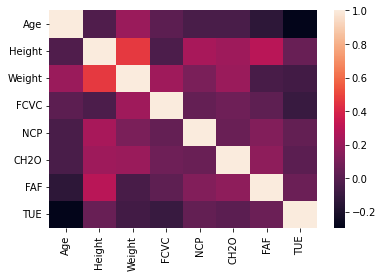

In [147]:
#Correlation plot

sns.heatmap(df.corr())